<a href="https://colab.research.google.com/github/vargopal/stockMarket/blob/F455--Quant-Finance/Class3MyNotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 877.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 4.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
  

In [2]:
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

pdr.get_data_yahoo('AAPL')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12 00:00:00-05:00,0.128348,0.128906,0.128348,0.128348,0.099874,469033600
1980-12-15 00:00:00-05:00,0.122210,0.122210,0.121652,0.121652,0.094663,175884800
1980-12-16 00:00:00-05:00,0.113281,0.113281,0.112723,0.112723,0.087715,105728000
1980-12-17 00:00:00-05:00,0.115513,0.116071,0.115513,0.115513,0.089886,86441600
1980-12-18 00:00:00-05:00,0.118862,0.119420,0.118862,0.118862,0.092492,73449600
...,...,...,...,...,...,...
2023-01-13 00:00:00-05:00,132.029999,134.919998,131.660004,134.759995,134.759995,57758000
2023-01-17 00:00:00-05:00,134.830002,137.289993,134.130005,135.940002,135.940002,63646600
2023-01-18 00:00:00-05:00,136.820007,138.610001,135.029999,135.210007,135.210007,69672800


In [3]:
# Get the data for the SPDR S&P 500 Fund
spy = pdr.get_data_yahoo('SPY')

# Trading day return
spy['otc']= spy['Close']/spy['Open'] -1

# Close to open return (overnight return)
# Shift function helps in a time series data
spy['cto']= spy['Open']/spy['Close'].shift() - 1


# Close to close return and compare with previous two return functions
spy['ret']= spy['Close']/spy['Close'].shift()-1

# Incorrect aggregation of otc and cto
#spy['otc']+ spy['cto']


# Calculating volatility
spy[['ret','otc','cto']].std()


spy.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,otc,cto,ret
Date,,,,,,,,,
1993-01-29 00:00:00-05:00,43.96875,43.96875,43.75000,43.93750,25.218220,1003200,-0.000711,NaN,NaN
1993-02-01 00:00:00-05:00,43.96875,44.25000,43.96875,44.25000,25.397589,480500,0.006397,0.000711,0.007112
1993-02-02 00:00:00-05:00,44.21875,44.37500,44.12500,44.34375,25.451389,201300,0.002827,-0.000706,0.002119
1993-02-03 00:00:00-05:00,44.40625,44.84375,44.37500,44.81250,25.720434,529400,0.009148,0.001409,0.010571
1993-02-04 00:00:00-05:00,44.96875,45.09375,44.46875,45.00000,25.828058,531500,0.000695,0.003487,0.004184


In [4]:
from scipy.special import binom

for n in [1, 3, 5, 10, 25]:
    print('{}:\t{}'.format(n, [int(binom(n, k)) for k in range(n+1)]))

1:	[1, 1]
3:	[1, 3, 3, 1]
5:	[1, 5, 10, 10, 5, 1]
10:	[1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1]
25:	[1, 25, 300, 2300, 12650, 53130, 177100, 480700, 1081575, 2042975, 3268760, 4457400, 5200300, 5200300, 4457400, 3268760, 2042975, 1081575, 480700, 177100, 53130, 12650, 2300, 300, 25, 1]


#Playing around with data
#pdr.get_data_yahoo('SPY', '2016-03-01')

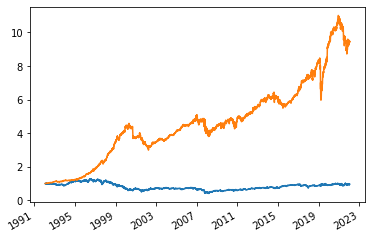

In [8]:
# Price level plot
import matplotlib.pyplot as plt
ax = (1 + spy['otc'].fillna(0)).cumprod().plot(xlabel ='')
bx = (1 + spy['cto'].fillna(0)).cumprod().plot(xlabel = '')
plt.show()

In [6]:
# Bar graph for annual returns
# Going into Class 4
ann_return = spy.resample('Y')['ret'].apply(lambda x: (1+x).product()-1)


# Creating a bar graph for the annual return
#plt.bar(spy.resample('Y'),ann_return)

In [20]:
# Homework review in class 4
#ax = (1+ spy['otc','cto'].fillna(0)).cumprod().plot(xlabel = '')

#plt.show()


# The graph should show the return of SPY overnight is greater than the the SPY returns during the day




# Day and night returns for each year on a bar graph
ann_return = spy.resample('A')[['ret','otc','cto']].apply(lambda x: (1+x).product()-1)
plt.bar(ann_return)

TypeError: ignored